In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np
from scipy.optimize import linprog
def nash_equilibrium(a):  
    A = a.transpose()
    rownum, colnum = np.shape(A)
    #создаем вектор c1 целевой функции для ЗЛП, соответсвующей первому игроку      
    c1 = np.array([1] * colnum)
    #создаем вектор c2 правой части для ЗЛП, соответствующей первому игроку 
    c2 = np.array([-1] * rownum)
    #приводим матрицу а к виду, подходящему для использования ф-ии linprog для нахождения стратегий игрока 1
    min_a = np.amin(A)
    if (min_a < 0):
        A -= min_a - 1
    A *= -1
    p = linprog(c1, A, c2).x
    v = np.dot(p, c1)
    p_opt = p * (1 / v)
    value = 1 / v
    if (min_a < 0):
        value += min_a - 1
    #приводим матрицу а к виду, подходящему для использования ф-ии linprog для нахождения стратегий игрока 2
    A *= -1
    #создаем вектор b1 целевой функции для ЗЛП, соответсвующей второму игроку
    b1 = np.array([-1] * rownum)
    #создаем вектор b2 правой части для ЗЛП, соответсвующей второму игроку
    b2 = np.array([1] * colnum)
    q = linprog(b1, a, b2).x
    q_opt = q * ( 1 / v)
    return value, p_opt, q_opt


In [3]:
#Nash
a = np.array([[0, 2, 0], 
              [3, 10, 1], 
              [2, -6, 0], 
              [-1, 4, 0]])

In [10]:
#Spectre is not full
a = np.array([[3, 4, 1], 
              [0, 2, 5], 
              [2, -3, 0], 
              [0, 3, 0]])

In [17]:
#Spectre is full
a = np.array([[0, 1, -1],
              [-1, 0, 1],
              [1, -1, 0]])

In [18]:
value, p, q = nash_equilibrium(a)

In [19]:
axisP = np.arange(1, int(len(a) + 1), 1)
axisQ = np.arange(1, len(a[0]) + 1, 1)    

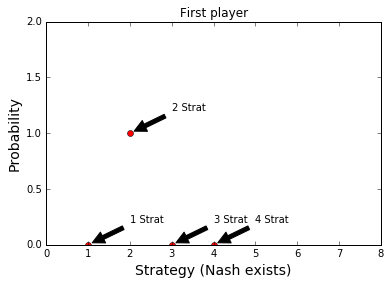

In [6]:
plt.plot(axisP, p, 'ro')
plt.axis([0, len(a) + 4, 0, 2])
for i in range(len(a)):
    plt.annotate(str(i + 1) + " Strat", xy=(i + 1, p[i]), 
                 xytext=(i + 2, p[i] + 0.2), arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel('Strategy (Nash exists)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.title('First player')
plt.show()

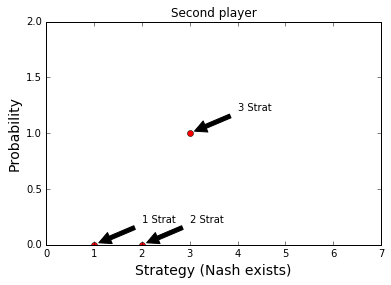

In [7]:
plt.plot(axisQ, q, 'ro')
plt.axis([0, len(a[0]) + 4, 0, 2])
for i in range(len(a[0])):
    plt.annotate(str(i + 1) + " Strat", xy=(i + 1, q[i]), 
                 xytext=(i + 2, q[i] + 0.2), arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel('Strategy (Nash exists)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.title('Second player')
plt.show()

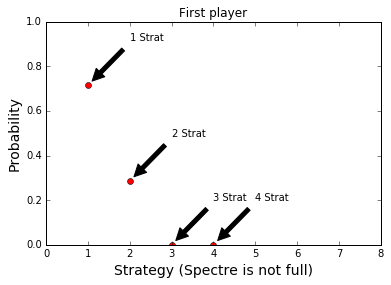

In [13]:
plt.plot(axisP, p, 'ro')
plt.axis([0, len(a) + 4, 0, 1])
for i in range(len(a)):
    plt.annotate(str(i + 1) + " Strat", xy=(i + 1, p[i]), 
                 xytext=(i + 2, p[i] + 0.2), arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel('Strategy (Spectre is not full)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.title('First player')
plt.show()

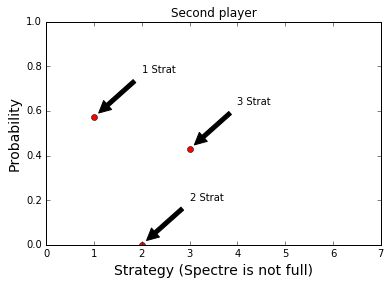

In [14]:
plt.plot(axisQ, q, 'ro')
plt.axis([0, len(a[0]) + 4, 0, 1])
for i in range(len(a[0])):
    plt.annotate(str(i + 1) + " Strat", xy=(i + 1, q[i]), 
                 xytext=(i + 2, q[i] + 0.2), arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel('Strategy (Spectre is not full)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.title('Second player')
plt.show()

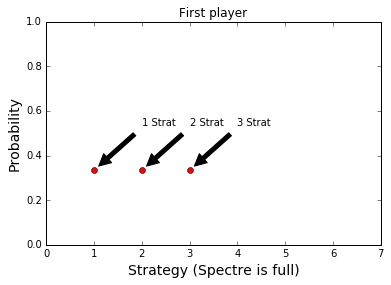

In [20]:
plt.plot(axisP, p, 'ro')
plt.axis([0, len(a) + 4, 0, 1])
for i in range(len(a)):
    plt.annotate(str(i + 1) + " Strat", xy=(i + 1, p[i]), 
                 xytext=(i + 2, p[i] + 0.2), arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel('Strategy (Spectre is full)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.title('First player')
plt.show()

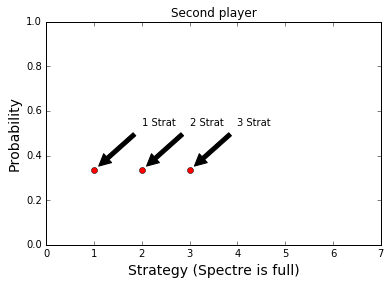

In [21]:
plt.plot(axisQ, q, 'ro')
plt.axis([0, len(a[0]) + 4, 0, 1])
for i in range(len(a[0])):
    plt.annotate(str(i + 1) + " Strat", xy=(i + 1, q[i]), 
                 xytext=(i + 2, q[i] + 0.2), arrowprops=dict(facecolor='black', shrink=0.1))
plt.xlabel('Strategy (Spectre is full)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.title('Second player')
plt.show()